In [3]:
!pip install PyDrive

In [4]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
download = drive.CreateFile({'id': '1NoS1dfG1azEH1dRueTigCgqn5LtVLH4w'})

In [9]:
download = drive.CreateFile({'id': '1Clzr9XDEdTbvntMsZlZtRkG9a8wp_xBS'})

In [11]:
download.GetContentFile('images (2).jpg')

In [12]:
download.GetContentFile('apple image.jpg')

In [13]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [14]:
# Function to show array of images (intermediate results)
def show_images(images):
	for i, img in enumerate(images):
		cv2.imshow("image_" + str(i), img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()


In [16]:
img_path1 = "images (2).jpg"

In [17]:
img_path2 = "apple image.jpg"

In [18]:
# Read image and preprocess
image = cv2.imread(img_path1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


In [19]:
#show_images([blur, edged])

# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [20]:
# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

In [21]:
# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

In [23]:
import pandas as pd
from scipy.spatial import distance_matrix

In [39]:
#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

#show_images([image, edged])
#print(len(cnts))

# Reference object dimensions
# Here for reference used, a 8cm x 8cm square
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dis_in_pixel = dist.euclidean(tl, tr)
dis_in_cm = 8
pixel_per_cm = dis_in_pixel/dis_in_cm


In [40]:
from google.colab.patches import cv2_imshow

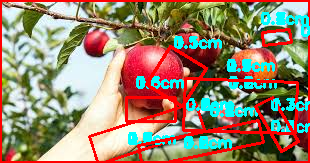

In [41]:
# Draw remaining contours
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
	wid = dist.euclidean(tl, tr)/pixel_per_cm
	ht = dist.euclidean(tr, br)/pixel_per_cm
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

cv2_imshow(image)